In [1]:
# yolo: you only look once
# ssd: single short detection
# here we are using yolo3: darknet
# currently we have yolo10 version
# Here i will explain from very scratch
# but yolo10 has package available now: ultralytics

# cfg: configuration file
#      It has model architecture
#      how many layers
#      how many convolution
#      batch size/learning rate/ optimizer

# It is Transfer learning, we are not developing the model from scratch

# weight file:
#     after develop the model we have weight file

# coco: is a dataset name on which the model devloped
# coco.names files: there are 80 classes

https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg

<img src="https://www.researchgate.net/publication/350502286/figure/fig2/AS:1007224067473409@1617152339116/YOLOv3-architecture.ppm" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 850px; height: 110px; margin: 14.5px 0px; width: 351px;" alt="YOLOv3 architecture. | Download Scientific Diagram" jsname="kn3ccd" aria-hidden="false">

In [2]:
# custom training: we will finetune exist model using our own data
# We are not training the model
# Your concentartion 
# If you see any code, you need to undestand each and every line

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [3]:
modelConf="yolov3-tiny.cfg"
modelWeights="yolov3-tiny.weights"
net = cv2.dnn.readNetFromDarknet(modelConf,modelWeights)
net

< cv2.dnn.Net 00000205F1F4A990>

In [5]:
classesFile="coco.names"
file=open(classesFile,'rt')
file.read()

'person\nbicycle\ncar\nmotorbike\naeroplane\nbus\ntrain\ntruck\nboat\ntraffic light\nfire hydrant\nstop sign\nparking meter\nbench\nbird\ncat\ndog\nhorse\nsheep\ncow\nelephant\nbear\nzebra\ngiraffe\nbackpack\numbrella\nhandbag\ntie\nsuitcase\nfrisbee\nskis\nsnowboard\nsports ball\nkite\nbaseball bat\nbaseball glove\nskateboard\nsurfboard\ntennis racket\nbottle\nwine glass\ncup\nfork\nknife\nspoon\nbowl\nbanana\napple\nsandwich\norange\nbroccoli\ncarrot\nhot dog\npizza\ndonut\ncake\nchair\nsofa\npottedplant\nbed\ndiningtable\ntoilet\ntvmonitor\nlaptop\nmouse\nremote\nkeyboard\ncell phone\nmicrowave\noven\ntoaster\nsink\nrefrigerator\nbook\nclock\nvase\nscissors\nteddy bear\nhair drier\ntoothbrush\n'

In [7]:
# classesFile="coco.names"
# with open(classesFile,'rt') as f:
#     classes = f.read().rstrip('\n').split('\n')
# classes
classesFile="coco.names"
file=open(classesFile,'rt')
classes=file.read().rstrip('\n').split('\n')
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
classesFile="coco.names"
with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
len(classes) # number of classes

80

In [11]:
dir(net)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'connect',
 'dump',
 'dumpToFile',
 'dumpToPbtxt',
 'empty',
 'enableFusion',
 'enableWinograd',
 'forward',
 'forwardAndRetrieve',
 'forwardAsync',
 'getFLOPS',
 'getInputDetails',
 'getLayer',
 'getLayerId',
 'getLayerNames',
 'getLayerTypes',
 'getLayersCount',
 'getLayersShapes',
 'getMemoryConsumption',
 'getOutputDetails',
 'getParam',
 'getPerfProfile',
 'getUnconnectedOutLayers',
 'getUnconnectedOutLayersNames',
 'quantize',
 'readFromModelOptimizer',
 'setHalideScheduler',
 'setInput',
 'setInputShape',
 'setInputsNames',
 'setParam',
 'setPreferableBackend',
 'setPreferableTarget']

In [13]:
l=net.getLayerNames()  # number of layers
len(l)


48

In [15]:
l

('conv_0',
 'bn_0',
 'leaky_1',
 'pool_1',
 'conv_2',
 'bn_2',
 'leaky_3',
 'pool_3',
 'conv_4',
 'bn_4',
 'leaky_5',
 'pool_5',
 'conv_6',
 'bn_6',
 'leaky_7',
 'pool_7',
 'conv_8',
 'bn_8',
 'leaky_9',
 'pool_9',
 'conv_10',
 'bn_10',
 'leaky_11',
 'pool_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'leaky_19',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'leaky_22',
 'conv_22',
 'permute_23',
 'yolo_23')

In [13]:
#net.getLayersShapes()

In [17]:
l1=net.getUnconnectedOutLayers()  # yolo layers indexes
l1

array([36, 48])

In [19]:
l[35],l[47]

('yolo_16', 'yolo_23')

In [21]:
l2=net.getUnconnectedOutLayersNames() # yolo layers names
l2

('yolo_16', 'yolo_23')

In [23]:
net.getInputDetails

<function Net.getInputDetails>

### blobfromImage() function

It returns a 4-dimensional array/blob for the input image. 
You can additionally use it to preprocess your image to match your input requirements. 
You can use its different parameters to transform your image, 

so let’s discuss all its parameters: 
    
**image**

- This is the image that we want to preprocess (for our model)
    
**scalefactor**

- scale factor basically multiplies(scales) our image channels. And remember that it scales it down by a factor of 1/n, where n is the scalefactor you provided.

**size**

- this is the target size that we want our image to become. Most common CNNs use 224×224 or 229×229 pixels as their input image array, but you can set it to meet your model requirements.

**mean**

- this is the mean subtracting values. You can input a single value or a 3-item tuple for each channel RGB, it will basically subtract the mean value from all the channels accordingly, this is done to normalize our pixel values. Note: mean argument utilizes the RGB sequence

**swapRB**

   - OpenCV by default reads an image in BGR format, but as I mentioned above that the mean argument takes in the values in RGB sequence, so to prevent any disruption this function, as the name implies swaps the red and blue channels. ( i.e why its default value is True)

In [41]:
frame=cv2.imread('dog.jpg')
frame.shape

(568, 756, 3)

Object detection models, such as YOLO, SSD, or Faster R-CNN, can generate multiple bounding boxes for the same object, especially in overlapping re
these overlapping boxes could clutter the output, making it harder to identify distinct objects. NMS removes these duplicates while retaining the box v
confidence score.

How Does NMS Work?

The NMS algorithm follows these steps:

. Start with Predicted Boxes:

Each bounding box has an associated confidence score and class label.
. Sort by Confidence:

Arrange all the predicted bounding boxes in descending order based on their confidence scores.
. Pick the Highest Confidence Box:

Select the box with the highest confidence score as the primary box.
. Remove Overlapping Boxes:

. For all remaining boxes of the same class, calculate the Intersection over Union (loU) with the primary box.If the loU of any box exceeds a pre
0.5), that box is considered redundant and removed.
· Repeat:


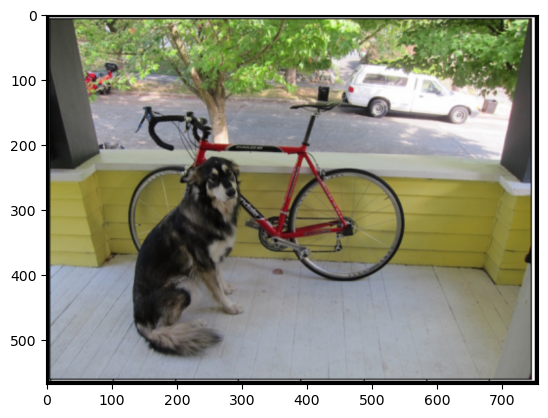

In [43]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [47]:
# reshape the image
inpWidth = 416
inpHeight = 416
frame=cv2.imread('dog.jpg')
# generally image will take as BGR we need to change RGB
blob = cv2.dnn.blobFromImage(frame, 
                             1/255,  # scaling
                             (inpWidth, inpHeight),# reshape 
                             [0,0,0],# colours 
                             1, # depth
                             crop = False) # pass the image

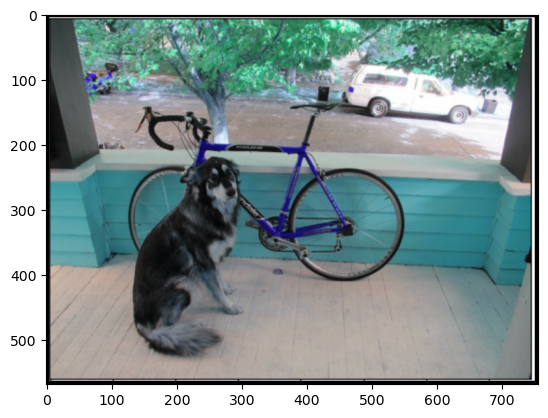

In [49]:
# Change BGR to RGB
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [51]:
frame.shape   # origianl shape

(568, 756, 3)

In [53]:
blob.shape # blob will take in revrse

(1, 3, 416, 416)

In [55]:
blob[0].shape

(3, 416, 416)

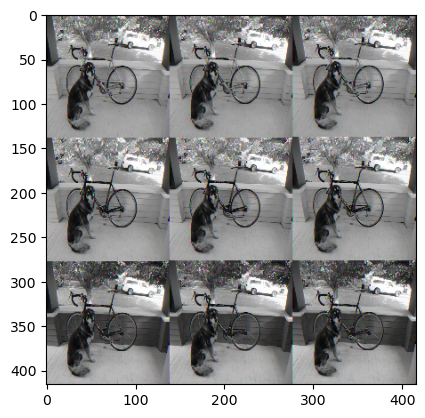

In [25]:
im=blob[0].reshape(416,416,3)
plt.imshow(im)

In [59]:
net.setInput(blob)

# for the yolo arch , we cant pass direct image
# we are converting image into blob

**Process flow**

<img src="https://www.labellerr.com/blog/content/images/2023/01/yolo-algorithm-1.webp" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 802px; height: 92px; margin: 23.5px 0px; width: 311px;" alt="Leveraging YOLO Object Detection for Accurate and Efficient Visual  Recognition" jsname="kn3ccd" aria-hidden="false">

1. you look only once

2. It is a pretrained model

3. Conf and weights

4. Yolo input image size : 416 x 416

5. The number of classes are 80

6. Blob from image

   - A) image resize

   - B) Cvt BGR to RGB

   - C) Normlaization

   - D) 4D (batch size,channel,height,width)

7. The image will pass to Yolo unconnected layers

8. It will give the multiple bounding boxes for each image

9. Each box has 85 values

      - A) First four values  x,y,w,h

      - B) 5th value is Confidence

      - C) last 80 values probability of each class

10. we need to iterate through each box vector and we need to filter out the boxes which are probability greater than 0.7



In [61]:
yolo_layers=net.getUnconnectedOutLayersNames()
outs = net.forward(yolo_layers) # blob is passing through yolo layers
outs
# there two yolo layers are there
# in image two objects are there
# we have total 80 classes are there
# we got 85 values 5+80
# 5 means  x,y,w,h,confidance
# 80 mean probability of each class

(array([[0.04358106, 0.04560139, 0.21793468, ..., 0.        , 0.        ,
         0.        ],
        [0.04070064, 0.04961931, 0.17077373, ..., 0.        , 0.        ,
         0.        ],
        [0.0345217 , 0.0467947 , 0.86555743, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96271193, 0.9680223 , 0.24457559, ..., 0.        , 0.        ,
         0.        ],
        [0.95949626, 0.95618385, 0.24700464, ..., 0.        , 0.        ,
         0.        ],
        [0.964815  , 0.9560769 , 0.845172  , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01361395, 0.01745606, 0.01718171, ..., 0.        , 0.        ,
         0.        ],
        [0.01675462, 0.02010871, 0.02693601, ..., 0.        , 0.        ,
         0.        ],
        [0.01328518, 0.01970865, 0.13269815, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.98849845, 0.98523784, 0.03117191, ..., 0.        , 0.        ,
         0.        

In [63]:
len(outs) # two objects output

2

In [65]:
len(outs[0]) # model is identifies total 507 boxes and predictins

#5+80 
# first 5 values are the  x,y,w,h and confidence for the first box
# remaining 80 are the classes

507

In [67]:
len(outs[0][2])

85

In [69]:
len(outs[1]) # 2028 bounding boxes 

2028

In [32]:
len(outs[0][0])  # 85 values


85

In [71]:
ar1=np.array([[1,2],[3,4]])
ar2=np.array([[10,20],[40,50]])
val=(ar1,ar2)
for array in val:
    for box in array:
        print(box)

[1 2]
[3 4]
[10 20]
[40 50]


- outs answer=2

- 2 images identified

- firstimage outs[0]

    - in first image len(outs[0])=507 boxes

    - outs[0][0] : first image with first vector

        - in this vector 85 values

        - probailities identifie from 5th index

In [73]:
list(outs[0][0])[:5]

[0.043581065, 0.045601387, 0.21793468, 0.16967615, 7.312648e-07]

In [35]:
list(outs[0][1])[5:]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<img src="https://miro.medium.com/v2/resize:fit:574/1*15uBgdR3_rNZzx665Leang.jpeg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 574px; height: 174px; margin: 0px; width: 285px;" alt="Evolution of YOLO — YOLO version 1 | by Abhijit V Thatte | Towards Data  Science" jsname="kn3ccd" aria-hidden="false">

In [36]:
outs[0][5] # object1 5th bounding box

array([1.1806286e-01, 5.0466016e-02, 6.5351433e-01, 6.7961794e-01,
       1.7038857e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

**Detect the Bounding Boxes**

Those are what are called normalized coordinates. 

To get the width in pixels you would need to multiply by the width of the images

In [37]:
frame.shape[0],frame.shape[1]

(576, 768)

In [38]:
frameHeight = frame.shape[0] # original image 576
frameWidth = frame.shape[1]  # 768
boxes=[]
confidences=[]
classIDs=[]
for out in outs: # calling each object boxes
    for detection in out: # calling each box
        score=detection[5:] # probability of 80 classes
        class_id=np.argmax(score) # max probability id
        probailibity=score[class_id] # getting the confidance
        if probailibity>0.70:         # if confidance >70% consider as that is valid bounding box
            print(detection)
            centerX = int(detection[0] * frameWidth)  # before we pass the object we divided with frame width
            # these are the normalized values so multiply again
            centerY = int(detection[1] * frameHeight)
            width = int(detection[2]* frameWidth)
            height = int(detection[3]*frameHeight )
            left = int(centerX - width/2)
            top = int(centerY - height/2)

            classIDs.append(class_id)
            confidences.append(float(probailibity))
            boxes.append([left, top, width, height])
            
boxes

[0.7506749  0.22071578 0.28650135 0.15503977 0.9590338  0.
 0.         0.7252457  0.         0.         0.         0.
 0.39470372 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.32989582 0.64003456 0.33577296 0.520143   0.83338046 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

[[466, 82, 220, 89], [124, 218, 257, 299]]

In [39]:
len(outs[0]),len(outs[1])

(507, 2028)

In [40]:
507+2028

2535

In [41]:
confidences

[0.7252457141876221, 0.8289399147033691]

**NMS: Non Max suppresion**

**IOU**: Intersection of Union

**jaccard distance**

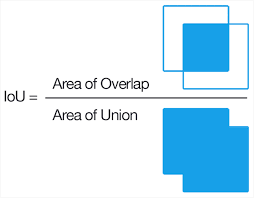

<img src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2016/09/iou_examples.png?lossy=2&amp;strip=1&amp;webp=1" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 600px; width: 351px; height: 145px; margin: 0px;" alt="Intersection over Union (IoU) for object detection - PyImageSearch" jsname="kn3ccd" aria-hidden="false">

by using for loop we will filter out the many boxes  which has prob less than some threshold
eventhough we might have multiple boxes for each image

- assume that we have 3 boxes left for one image after iterating for loop

box1   box2   box3

- Iou (Box1 vs Box2) > 0.5  

- these two boxes are important out of these which is highest confidence that will consider as final box

- IOU (Box1  vs Box3) < 0.5

- we will consider these two boxes very rare

- This method called as **NMS(Non Max suppression)**



In [42]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
indexes  # surprass many boxes

array([1, 0])

In [43]:
boxes[1],boxes[0]

([124, 218, 257, 299], [466, 82, 220, 89])

**Apply the Bounding Box**

In [44]:
indexes,boxes[indexes[0]],boxes[indexes[1]]

(array([1, 0]), [124, 218, 257, 299], [466, 82, 220, 89])

In [45]:
classIDs,classes[classIDs[0]],classes[classIDs[1]]

([2, 16], 'car', 'dog')

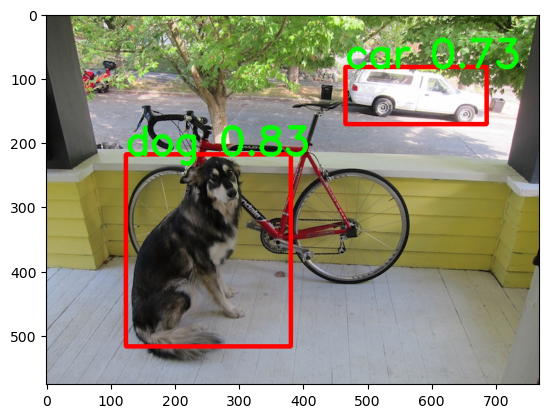

In [46]:
font=cv2.FONT_HERSHEY_SIMPLEX
color=(255,0,0) # RGB
for i in indexes:
    x,y,w,h=boxes[i]
    label=str(classes[classIDs[i]])
    confi=str(round(confidences[i],2))
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i)   # (x,y): left,top     (x+w,y+h): right,bottom
    cv2.putText(img,
                label +" "+confi,
                (x,y),
                font,
                2,
                (0,255,0),
                5)
plt.imshow(img)

## Method-1:
    
**Bounding box on images**

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [52]:
def post_process(frame,outs,img,classes):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]
    boxes=[]
    confidences=[]
    classIDs=[]
    for out in outs: # calling each object boxes
        for detection in out: # calling each box
            score=detection[5:] # probability of 80 classes
            class_id=np.argmax(score) # max probability id
            confidence=score[class_id] # getting the confidance
            if confidence>0.7:         # if confidance >70% consider as that is valid bounding box
                centerX = int(detection[0] * frameWidth)  # before we pass the object we divided with frame width
                # these are the normalized values so multiply again
                centerY = int(detection[1] * frameHeight)
                width = int(detection[2]* frameWidth)
                height = int(detection[3]*frameHeight )
                left = int(centerX - width/2)
                top = int(centerY - height/2)
                classIDs.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
                
    indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    font=cv2.FONT_HERSHEY_SIMPLEX
    color=(255,0,0) # RGB
    for i in indexes:
        x,y,w,h=boxes[i]
        label=str(classes[classIDs[i]])
        confi=str(round(confidences[i],2))
        cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i)   # (x,y): left,top     (x+w,y+h): right,bottom
        cv2.putText(img,label +" "+confi,(x,y),font,2,(255,255,255),3)
    plt.imshow(img)



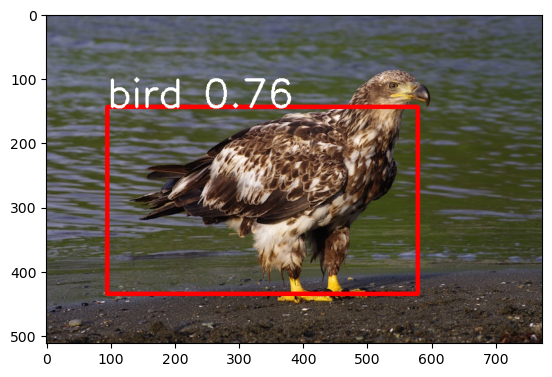

In [53]:
# All at one place
modelConf="yolov3-tiny.cfg"
modelWeights="yolov3-tiny.weights"
classesFile="coco.names"
image='./images/eagle.jpg'
def yolo_out(modelConf,modelWeights,classesFile,image):
    net = cv2.dnn.readNetFromDarknet(modelConf,modelWeights)
    with open(classesFile,'rt') as f:
        classes = f.read().rstrip('\n').split('\n')

    inpWidth = 416
    inpHeight = 416

    frame=cv2.imread(image)
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 

    blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop = False) # pass the image
    net.setInput(blob)
    yolo_layers=net.getUnconnectedOutLayersNames()
    outs = net.forward(yolo_layers)
    post_process(frame,outs,img,classes)

yolo_out(modelConf,modelWeights,classesFile,image)

https://docs.ultralytics.com/quickstart/#use-ultralytics-with-python

In [50]:
# streamlit application ( Everyone)
# yoloV8: ultralytics 

# Object tracking
# Vehicle counter
# Pose detection
# Number plate detection
# Covid social distance
# RCNN (Everyone)

# choose your use case  end to end
# transfer 
x2,y2,w2, h2=box2

# Calculate corners
x1_min, y1_min, x1_max, y1_max = x1, y1, x1 + w1, y1 + h1
x2_min, y2_min, x2_max, y2_max = x2, y2, x2+ w2, y2 + h2

# Calculate intersection
inter_x_min = max(x1_min, x2_min)
inter_y_min = max(y1_min, y2_min)
inter_x_max = min(x1_max, x2_max)
inter_y_max = min(y1_max, y2_max)

inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

# Calculate union
box1_area = w1 * h1
box2_area = w2 * h2
union_area = box1_area + box2_area - inter_area

In [ ]:
]:

font=cv2. FONT_HERSHEY_SIMPLEX
color=(255,0,0) # RGB
for i in indexes:
x,y,w,h=boxes[i]
label=str(classes[classIDs[i]])
confi=str(round(confidences[i],2))
cv2.rectangle(img, (x,y),(x+w,y+h),color,5,i)
cv2.putText(img,
label +" "+confi,
(x,y),
font,
2,
(0,255,0),
5)

# (x,y): Left, top

(x+w, y+h): ri

I

plt.imshow(img)